<a href="https://colab.research.google.com/github/ananyag27/Machine-Learning-Lab/blob/main/LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = '/content/Lab Session Data.xlsx'
purchase_data = pd.read_excel(file_path, sheet_name='Purchase data')

In [ ]:
#A2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_excel('/content/Lab Session Data.xlsx', sheet_name='Purchase data')
X = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = data['Payment (Rs)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse ** 0.5
mape = (abs(y_test - y_test_pred) / y_test).mean() * 100
r2 = r2_score(y_test, y_test_pred)

print(f'MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R²: {r2}')


MSE: 3346.1111111111118, RMSE: 57.8455798753121, MAPE: 32.128890384697115, R²: 0.14265786027444038


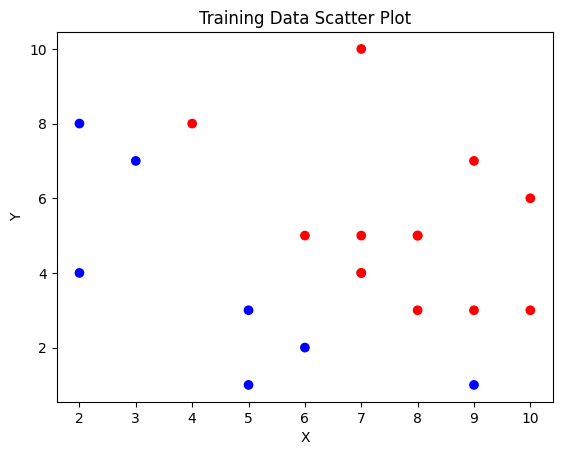

In [ ]:
#A3
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.where(X_train.sum(axis=1) > 10, 1, 0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training Data Scatter Plot')
plt.show()

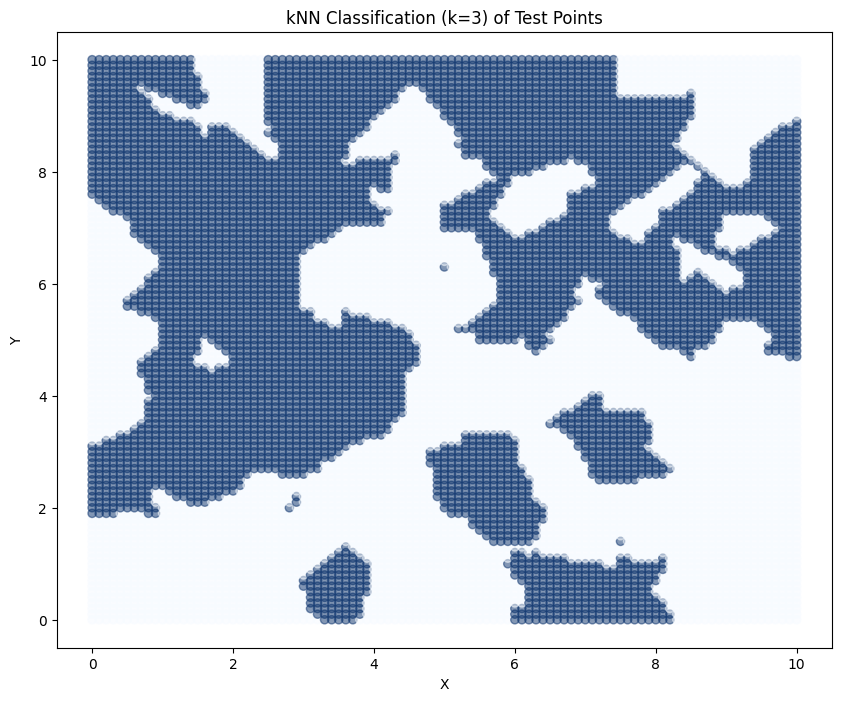

In [ ]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_points = np.c_[X_test.ravel(), Y_test.ravel()]
np.random.seed(0)
X_train = np.random.rand(100, 2) * 10
y_train = np.random.choice([0, 1], size=100)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(test_points)
plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], c=y_pred, cmap=plt.cm.Blues, alpha=0.5)
plt.title('kNN Classification (k=3) of Test Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

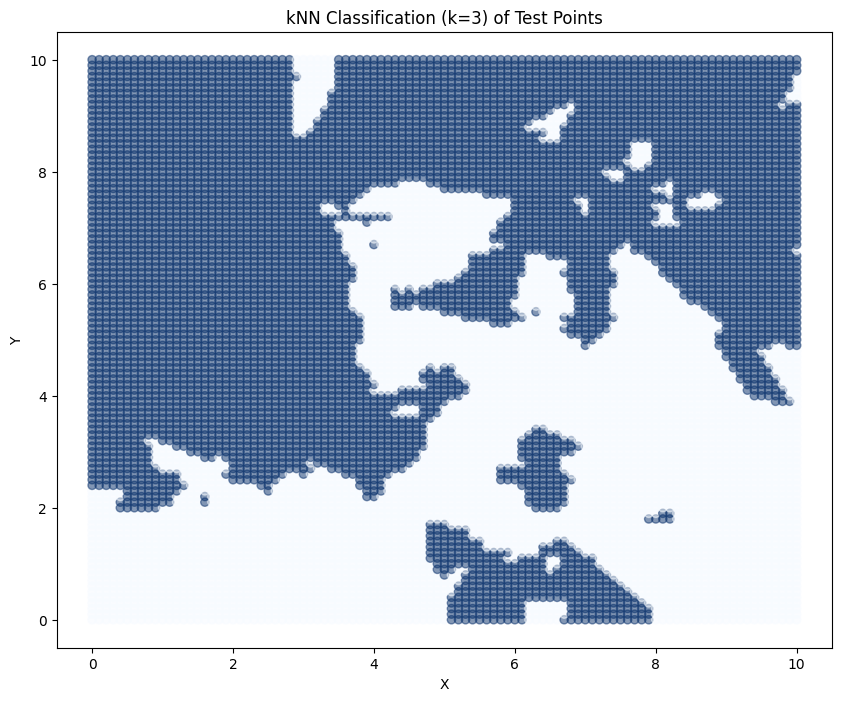

In [ ]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X_test, Y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_points = np.c_[X_test.ravel(), Y_test.ravel()]
np.random.seed(0)
X_train = np.random.rand(100, 2) * 10
y_train = np.random.choice([0, 1], size=100)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(test_points)
plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], c=y_pred, cmap=plt.cm.Blues, alpha=0.5)
plt.title('kNN Classification (k=3) of Test Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/cleaned_survey.csv')

In [3]:
import pandas as pd
data = pd.read_csv('/content/image_data3.csv')


class_ajanta = data[data['label'] == 'Ajanta Caves']
class_mysore = data[data['label'] == 'mysore_palace']
class_gateway = data[data['label'] == 'Gateway of India']

features_ajanta = class_ajanta.drop('label', axis=1)
features_mysore = class_mysore.drop('label', axis=1)
features_gateway = class_gateway.drop('label', axis=1)

features_ajanta = features_ajanta.to_numpy()
features_mysore = features_mysore.to_numpy()
features_gateway = features_gateway.to_numpy()

In [7]:
def train_test():
  X = data.drop('label', axis=1)
  y = data['label']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test

def knn(X_train, y_train):
  neigh = KNeighborsClassifier(n_neighbors=5)
  neigh.fit(X_train, y_train)
  return neigh

def performance(neigh, X_test, y_test):
  accuracy = neigh.score(X_test, y_test)
  print(f'Accuracy: {accuracy}')
  y_pred = neigh.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix:\n{cm}")
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  f1 = f1_score(y_test, y_pred, average='macro')
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1-Score: {f1}")

def visualize_two_features():
  feature1 = 50
  feature2 = 2000
  ajanta_points = class_ajanta.iloc[:, [feature1, feature2]]
  mysore_points = class_mysore.iloc[:, [feature1, feature2]]
  plt.scatter(ajanta_points.iloc[:, 0], ajanta_points.iloc[:, 1], color='blue', label='Ajanta Caves')
  plt.scatter(mysore_points.iloc[:, 0], mysore_points.iloc[:, 1], color='red', label='Mysore Palace')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()

def classify_and_plot():
  feature1 = 0
  feature2 = 200
  ajanta_points = class_ajanta.iloc[:, [feature1, feature2]]
  mysore_points = class_mysore.iloc[:, [feature1, feature2]]
  X_train = np.vstack((ajanta_points, mysore_points))
  y_train = np.array([0] * len(ajanta_points) + [1] * len(mysore_points))
  knn = KNeighborsClassifier(n_neighbors=55)
  knn.fit(X_train, y_train)
  x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
  test_data = np.c_[x_test.ravel(), y_test.ravel()]
  predictions = knn.predict(test_data)
  predictions = predictions.reshape(x_test.shape)
  plt.contourf(x_test, y_test, predictions, alpha=0.3, cmap=plt.cm.coolwarm)
  plt.scatter(ajanta_points.iloc[:, 0], ajanta_points.iloc[:, 1], color='blue')
  plt.scatter(mysore_points.iloc[:, 0], mysore_points.iloc[:, 1], color='red')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()

X_train, X_test, y_train, y_test = train_test()
neigh = knn(X_train, y_train)
performance(neigh, X_test, y_test)

grid_search = perform_grid_search(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_
print(f"Best k: {best_k}")


visualize_two_features()
classify_and_plot()


NameError: name 'train_test_split' is not defined